In [1]:
from netpyne import specs, sim
import pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Set the network parameters

In [2]:
# SimConfig and NetParams are the objsects 
# storing the parameters of the simulation and the network

netParams=specs.NetParams()   
simConfig=specs.SimConfig()  

In [7]:
### Set the network paramters ###

# Population parameters
netParams.popParams['population1']={'numCells':200, # population1 comprises 200 
         'cellType':'PYR', # pyramidal cells
        'cellModel':'HH'}  # of the hodgkyn-huxley model, which is native to netpyne
         


# Cell parameters

## The cell properties

# First, we create a dict of cell rules. The conds refer to the cell's conditions
# and the secs refers to its sections 
cellRule={'conds':{'cellModel':'HH', 'cellType': 'PYR'},  'secs': {}} 
cellRule['secs']['soma']={'geom': {}, 'mechs': {}}  


cellRule['secs']['soma']['geom']={'diam': 18.8, 'L': 18.8, 'Ra': 123.0} # The soma's geomtry  
cellRule['secs']['soma']['mechs']['hh']={'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70} # The soma's hh mechanism
cellRule['secs']['soma']['vinit']=-71 # the initial cell's electric potential

netParams.cellParams['PYR']=cellRule  # add rule dictionary to the cell params


# Synaptic mechanism parameters

# Exp2Syn is a two state kinetic scheme synapse where
# the rise time is set by tau1 and the decay time by tau2.
# the reversal potential is e.

netParams.synMechParams['AMPA']={'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 1.0, 'e': 0}
netParams.synMechParams['NMDA']={'mod': 'Exp2Syn', 'tau1': 0.8, 'tau2': 5.3, 'e': 0} 
netParams.synMechParams['GABA']={'mod': 'Exp2Syn', 'tau1': 0.6, 'tau2': 8.5, 'e': -75}



# Connectivity parameters
# AMPA synapses
netParams.connParams['population1->population1_AMPA']={
    'preConds': {'pop': 'population1'}, 
    'postConds': {'pop': 'population1'},
    'weight': 0.1,       
    'delay': '0.2+normal(13.0,1.4)',     # delay min=0.2, mean=13.0, var = 1.4
    'synMech': 'AMPA'}    

# NMDA synapses
netParams.connParams['population1->population1_NMDA']={
    'preConds': {'pop': 'population1'}, 
    'postConds': {'pop': 'population1'},
    'weight': 0.7,       
    'delay': '0.2+normal(13.0,1.4)',     # delay min=0.2, mean=13.0, var = 1.4
    'synMech': 'NMDA'}  

# GABA synapses
netParams.connParams['population1->population1_GABA']={
    'preConds': {'pop': 'population1'}, 
    'postConds': {'pop': 'population1'},
    'weight': 0.005,    
    'delay': 5,    
    'synMech': 'GABA'}    



In [ ]:
# Stimulation parameters
netParams.stimSourceParams['background']={'type': 'NetStim', # network stimuli
                                          'rate': 30, # of 30 hz
                                          'noise': 0.5, 'start': 1}

netParams.stimTargetParams['background->population1']={'source': 'background', 
                                                       'conds': {'pop': 'population1'}, 
                                                       'weight': 0.1, 
                                                       'delay': 'uniform(1,2)'}



In [4]:
### Set the simulation ###

# Simulation parameters
simConfig.duration = .5*1e3 # Duration of the simulation, in ms
simConfig.dt = 0.025 # Internal integration timestep to use
simConfig.seeds = {'conn': 1, 'stim': 1, 'loc': 1} # Seeds for randomizers (connectivity, input stimulation and cell locations)
simConfig.verbose = False  # show detailed messages 
simConfig.hParams = {'v_init': -75}

# Recording 
simConfig.recordCells = []  # which cells to record from
simConfig.recordTraces = {'Vsoma':{'sec':'soma','loc':0.5,'var':'v'}}
simConfig.recordStim = True  # record spikes of cell stims
simConfig.recordStep = 0.1 # Step size in ms to save data (eg. V traces, LFP, etc)




In [5]:
## Run simulation
sim.createSimulateAnalyze(netParams=netParams, simConfig=simConfig)



Creating network of 1 cell populations on 1 hosts...
  Number of cells on node 0: 200 
  Done; cell creation time = 0.03 s.
Making connections...
  Number of connections on node 0: 39800 
  Done; cell connection time = 1.96 s.
Adding stims...
  Number of stims on node 0: 200 
  Done; cell stims creation time = 0.02 s.
Recording 200 traces of 1 types on node 0

Running simulation for 500.0 ms...
  Done; run time = 1.80 s; real-time ratio: 0.28.

Gathering data...
  Done; gather time = 0.76 s.

Analyzing...
  Cells: 200
  Connections: 40000 (200.00 per cell)
  Spikes: 3002 (30.02 Hz)
  Simulated time: 0.5 s; 1 workers
  Run time: 1.80 s
  Done; saving time = 0.02 s.
  Done; plotting time = 0.00 s

Total time = 4.60 s


Plotting 2D representation of network cell locations and connections...


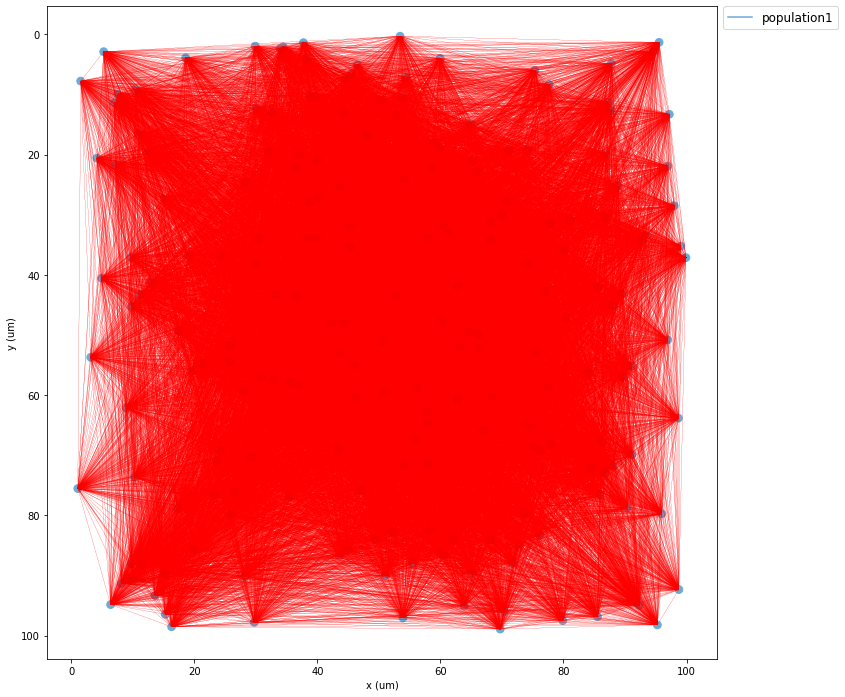

In [6]:
sim.analysis.plot2Dnet()
pylab.show()

### Run with NMDA, AMPA, GABA

In [7]:
sim.runSim()                          # run parallel Neuron simulation
sim.gatherData()                      # gather spiking data and cell info from each node



Running simulation for 500.0 ms...
  Done; run time = 2.29 s; real-time ratio: 0.22.

Gathering data...
  Done; gather time = 2.97 s.

Analyzing...
  Cells: 200
  Connections: 40000 (200.00 per cell)
  Synaptic contacts: 119600 (598.00 per cell)
  Spikes: 364 (3.64 Hz)
  Simulated time: 0.5 s; 1 workers
  Run time: 2.29 s


{spkt: [2.650000000100004, 3.07500000010001, 3.5500000001000167, 3.7500000001000195, 4.1000000001000245, 4.150000000100025, 4.175000000100026, 4.300000000100027, 4.525000000100031, 4.600000000100032, 4.600000000100032, 4.600000000100032, 4.925000000100036, 5.000000000100037, 5.025000000100038, 5.025000000100038, 5.2250000001000405, 5.400000000100043, 5.775000000100048, 5.825000000100049, 5.850000000100049, 5.850000000100049, 5.87500000010005, 5.87500000010005, 5.90000000010005, 5.9250000001000505, 5.950000000100051, 6.050000000100052, 6.225000000100055, 6.500000000100059, 6.7000000001000615, 6.750000000100062, 6.750000000100062, 6.850000000100064, 7.025000000100066, 7.1250000001000675, 7.175000000100068, 7.375000000100071, 7.5500000001000735, 7.925000000100079, 8.00000000010008, 8.17500000010007, 8.300000000100063, 8.425000000100056, 8.70000000010004, 8.975000000100025, 9.05000000010002, 9.075000000100019, 9.200000000100012, 9.250000000100009, 9.450000000099998, 9.500000000099995, 9.55

Plotting raster...


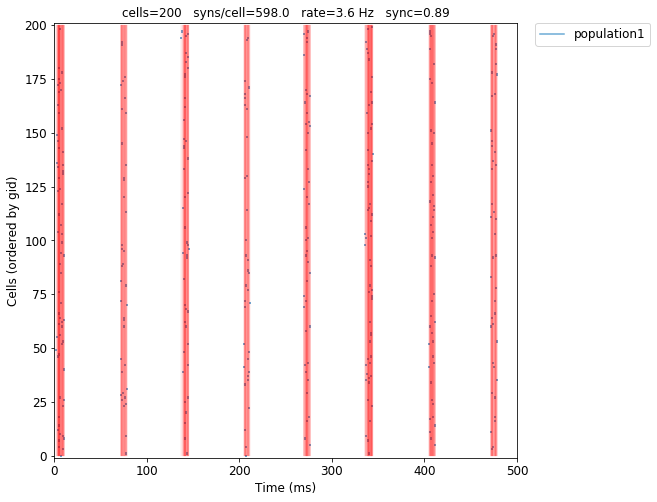

In [8]:
sim.analysis.plotRaster(syncLines=True)
pylab.show()

Plotting spike histogram...


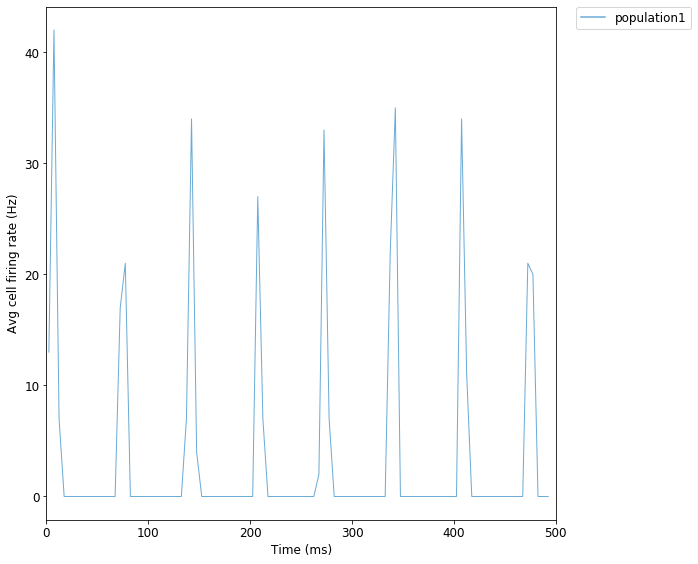

In [9]:
sim.analysis.plotSpikeHist(include=['population1'])
pylab.show()

### Run with NMDA "block"

In [10]:
sim.net.modifyConns({'conds': {'label': 'population1->population1_NMDA'}, 'weight': 0})

sim.runSim()                          # run parallel Neuron simulation
sim.gatherData()                      # gather spiking data and cell info from each node


Modfying connection parameters...
  Done; connections modification time = 0.30 s.

Running simulation for 500.0 ms...
  Done; run time = 2.90 s; real-time ratio: 0.17.

Gathering data...
  Done; gather time = 3.17 s.

Analyzing...
  Cells: 200
  Connections: 40000 (200.00 per cell)
  Synaptic contacts: 119600 (598.00 per cell)
  Spikes: 755 (7.55 Hz)
  Simulated time: 0.5 s; 1 workers
  Run time: 2.90 s


{spkt: [2.650000000100004, 3.07500000010001, 3.5500000001000167, 3.7500000001000195, 4.1000000001000245, 4.150000000100025, 4.175000000100026, 4.300000000100027, 4.525000000100031, 4.600000000100032, 4.600000000100032, 4.600000000100032, 4.925000000100036, 5.000000000100037, 5.025000000100038, 5.025000000100038, 5.2250000001000405, 5.400000000100043, 5.775000000100048, 5.825000000100049, 5.850000000100049, 5.850000000100049, 5.87500000010005, 5.87500000010005, 5.90000000010005, 5.9250000001000505, 5.950000000100051, 6.050000000100052, 6.225000000100055, 6.500000000100059, 6.7000000001000615, 6.750000000100062, 6.750000000100062, 6.850000000100064, 7.025000000100066, 7.1250000001000675, 7.175000000100068, 7.375000000100071, 7.5500000001000735, 7.925000000100079, 8.00000000010008, 8.17500000010007, 8.300000000100063, 8.425000000100056, 8.70000000010004, 8.975000000100025, 9.05000000010002, 9.075000000100019, 9.200000000100012, 9.250000000100009, 9.450000000099998, 9.500000000099995, 9.55

Plotting raster...


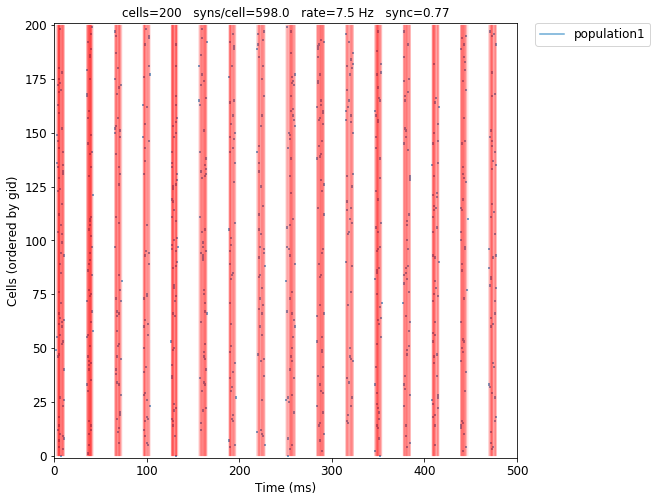

In [11]:
sim.analysis.plotRaster(syncLines=True)
pylab.show()

Plotting spike histogram...


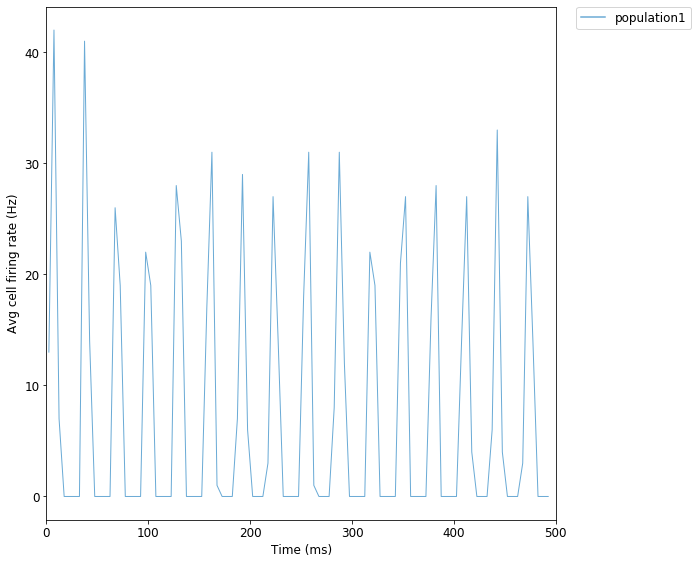

In [12]:
sim.analysis.plotSpikeHist(include=['population1'])
pylab.show()

### Run with enhaced GABA (return to normal NMDA)

In [13]:
sim.net.modifyConns({'conds': {'label': 'population1->population1_NMDA'}, 'weight': 0.7})
sim.net.modifyConns({'conds': {'label': 'population1->population1_GABA'}, 'weight': 0.5})


sim.runSim()                          # run parallel Neuron simulation
sim.gatherData()                      # gather spiking data and cell info from each node


Modfying connection parameters...
  Done; connections modification time = 0.30 s.
Modfying connection parameters...
  Done; connections modification time = 0.25 s.

Running simulation for 500.0 ms...
  Done; run time = 2.14 s; real-time ratio: 0.23.

Gathering data...
  Done; gather time = 3.50 s.

Analyzing...
  Cells: 200
  Connections: 40000 (200.00 per cell)
  Synaptic contacts: 119600 (598.00 per cell)
  Spikes: 267 (2.67 Hz)
  Simulated time: 0.5 s; 1 workers
  Run time: 2.14 s


{spkt: [2.650000000100004, 3.07500000010001, 3.5500000001000167, 3.7500000001000195, 4.1000000001000245, 4.150000000100025, 4.175000000100026, 4.300000000100027, 4.525000000100031, 4.600000000100032, 4.600000000100032, 4.600000000100032, 4.925000000100036, 5.000000000100037, 5.025000000100038, 5.025000000100038, 5.2250000001000405, 5.400000000100043, 5.775000000100048, 5.825000000100049, 5.850000000100049, 5.850000000100049, 5.87500000010005, 5.87500000010005, 5.90000000010005, 5.9250000001000505, 5.950000000100051, 6.050000000100052, 6.225000000100055, 6.500000000100059, 6.7000000001000615, 6.750000000100062, 6.750000000100062, 6.850000000100064, 7.025000000100066, 7.1250000001000675, 7.175000000100068, 7.375000000100071, 7.5500000001000735, 66.30000000010651, 66.32500000010651, 66.52500000010656, 66.52500000010656, 66.67500000010659, 66.75000000010661, 66.75000000010661, 66.77500000010662, 66.87500000010664, 67.45000000010677, 67.62500000010681, 67.70000000010683, 67.75000000010684, 

Plotting raster...


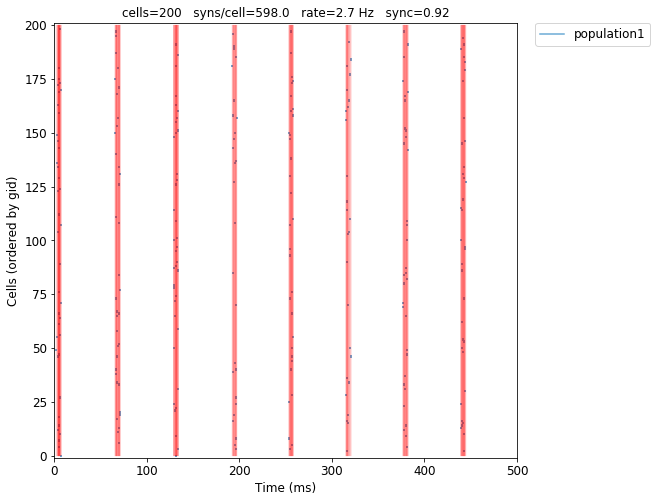

In [14]:
sim.analysis.plotRaster(syncLines=True)
pylab.show()

Plotting spike histogram...


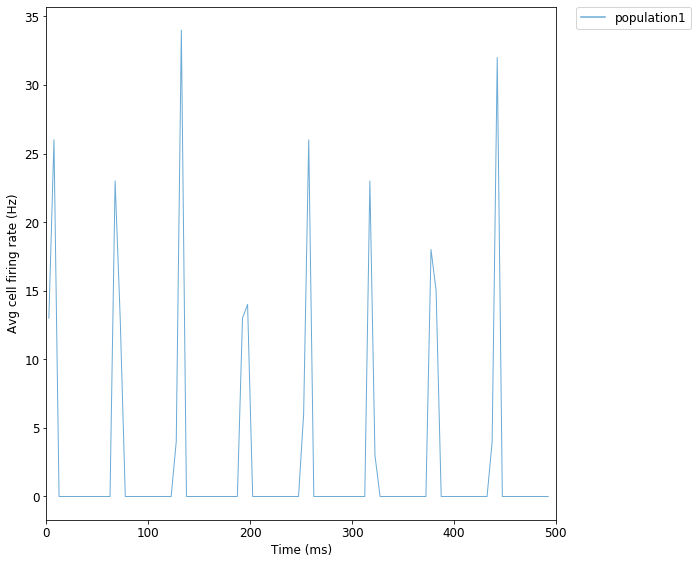

In [15]:
sim.analysis.plotSpikeHist(include=['population1'])
pylab.show()

In [27]:
sim.net.modifyConns({'conds': {'label': 'population1->population1_GABA'}, 'weight': 0})


sim.runSim()                          # run parallel Neuron simulation
sim.gatherData()                      # gather spiking data and cell info from each node


Modfying connection parameters...
  Done; connections modification time = 0.21 s.

Running simulation for 500.0 ms...
  Done; run time = 2.21 s; real-time ratio: 0.23.

Gathering data...
  Done; gather time = 2.49 s.

Analyzing...
  Cells: 200
  Connections: 40000 (200.00 per cell)
  Synaptic contacts: 119600 (598.00 per cell)
  Spikes: 1126 (11.26 Hz)
  Simulated time: 0.5 s; 1 workers
  Run time: 2.21 s


{spkt: [2.650000000100004, 3.07500000010001, 3.5500000001000167, 3.7500000001000195, 4.1000000001000245, 4.150000000100025, 4.175000000100026, 4.300000000100027, 4.525000000100031, 4.600000000100032, 4.600000000100032, 4.600000000100032, 4.925000000100036, 5.000000000100037, 5.025000000100038, 5.025000000100038, 5.2250000001000405, 5.400000000100043, 5.775000000100048, 5.825000000100049, 5.850000000100049, 5.850000000100049, 5.87500000010005, 5.87500000010005, 5.90000000010005, 5.9250000001000505, 5.950000000100051, 6.050000000100052, 6.225000000100055, 6.500000000100059, 6.7000000001000615, 6.750000000100062, 6.750000000100062, 6.850000000100064, 7.025000000100066, 7.1250000001000675, 7.175000000100068, 7.375000000100071, 7.5500000001000735, 7.925000000100079, 8.00000000010008, 8.150000000100071, 8.275000000100064, 8.400000000100057, 8.675000000100042, 8.925000000100027, 9.000000000100023, 9.025000000100022, 9.125000000100016, 9.175000000100013, 9.350000000100003, 9.4000000001, 9.4500

Plotting raster...


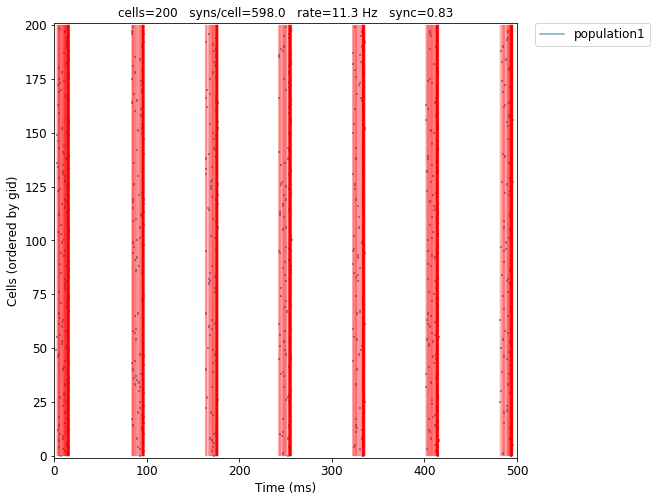

In [28]:
sim.analysis.plotRaster(syncLines=True)
pylab.show()

Plotting spike histogram...


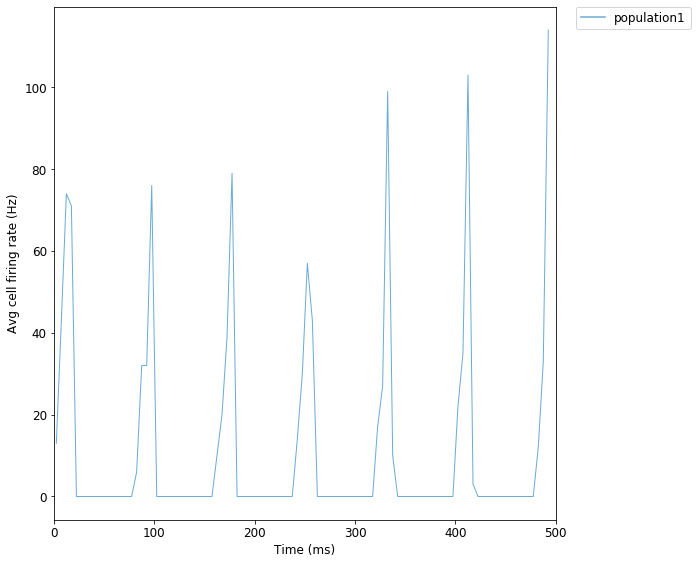

In [29]:
sim.analysis.plotSpikeHist(include=['population1'])
pylab.show()